# Linear Regression  on a Combined Cycle Power Plant (CCPP) data
## Dataset description

Link: http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE)  of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.

## Important!
If you do not understand what a command below is doing, check the online manual from the corresponding module (e.g., pandas, scikit-learn, etc.)

In [2]:
#this makes division among integeres get the floor of the corresponding division among real numbers
from __future__ import division  
# to get in-line plots
%matplotlib nbagg
import matplotlib.pyplot as plt

## Import Data
Load the data from a .csv file

In [3]:
# Load the data; the 'pandas' module provides useful methods to read files in specific
# formats, e.g. comma separated values (csv)
import pandas as pd

df = pd.read_csv('ccpp_Data.csv', sep = ';')
Data = df.values  # returns a numpy array with data

# A quick overview of data

To inspect the data you can use the method describe()

In [4]:
df.describe() # to get info on the data

,AT,V,AP,RH,PE
count,5569.000000,5569.000000,5569.000000,5569.000000,5569.00000
mean,19.690587,54.403031,1013.234469,73.459759,454.24341
std,7.482110,12.741350,5.917864,14.706668,17.08875
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.520000,41.740000,1009.050000,63.380000,439.49000
50%,20.380000,52.750000,1012.940000,75.160000,451.64000
75%,25.790000,66.540000,1017.280000,84.960000,468.17000
max,37.110000,81.560000,1033.290000,100.160000,495.23000


# Split data in training and validation sets

Given $N$ total data, keep $N_t$ data as training data and $N_{val}:=N-N_t$ as validation data splitting is random. Use as seed your ``numero di matricola'' (see below)



In [5]:
# Split Training-Validation data

#as input (X) we considering all but the last column, that is instead the output (Y)

X = Data[:,:-1]
Y = Data[:,-1]

Numero_di_Matricola = 1067494 # put here your ``numero di matricola''; this is very important!
#this gives us the number of rows in the matrix X
N = X.shape[0]

Nt = 1000  #Number of data points that we are going to include in the training data
Nval = N-Nt #Number of data points that we are going to include in the validation data

# Split data into train and validation data using a skikit-learn command
from sklearn.cross_validation import train_test_split
Xtr, Xva, Ytr, Yva = train_test_split(X, Y, test_size=Nval/N,random_state = Numero_di_Matricola)
Ntr = Xtr.shape[0]
Nva = Xva.shape[0]


## Data Preprocessing 

Design matrix is standardized to have zero-mean and unit variance (columnwise) WHY?

In [6]:
# Standardize the Features Matrix
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
Xtr = scaler.transform(Xtr)
Xva = scaler.transform(Xva)  # use the same transformation on test data

## Compute the Linear Regression coefficients

First add a column of ones to the design matrix (use the numpy function  hstack) and then solve in the least squares sense (this is already done below)

## TO DO 1

 - use np.linalg.lstsq to fit the linear regresion model 

 - or alternatively do direct calculations 

In [7]:
# Compute Linear Regression using numpy
import numpy as np
Xtr = np.hstack((np.ones((Ntr,1)),Xtr))  # add a column of ``one'' as first column to account for non-zero mean outputs.
Xva = np.hstack((np.ones((Nva,1)),Xva))  # add a column of ``one'' as first column to account for non-zero mean outputs.

b_np, RSStr_np, rank_Xtr, sv_Xtr = np.linalg.lstsq(Xtr,Ytr,-1)

print b_np, RSStr_np, rank_Xtr, sv_Xtr

# alternatively could do direct calculation. Some notes:
#- to multiply two matrices you can use np.dot(...)
#- to compute the residual sum of squares, you can use its relation with the norm of a vector...

Sigma_inv = np.linalg.pinv(np.dot(Xtr.transpose(),Xtr),1e-15)   #  (inverse of X'X) use pseudoiverse to make sure things work also if Xtr is low rank
b_np1 = np.dot(Sigma_inv, np.dot(Xtr.transpose(),Ytr))    # (X'X)^-1 X' Y 
RSStr_np1 = np.linalg.norm((Ytr-np.dot(Xtr,b_np1))) **2 # compute residual sum of squares

#now let's print the coefficient so we can compare them
print "LS coefficients:", b_np
print "LS coefficients 1:", b_np1

#now let's print the residual sum of squares
print "RSS:",  RSStr_np
print "RSS1: ", RSStr_np1



[ 454.04549985  -14.17766132   -3.33928409    0.52507852   -2.07084049] [ 19746.99809466] 5 [ 50.46175189  31.62731717  29.93834153  23.69417731   9.94955015]
LS coefficients: [ 454.04549985  -14.17766132   -3.33928409    0.52507852   -2.07084049]
LS coefficients 1: [ 454.04549985  -14.17766132   -3.33928409    0.52507852   -2.07084049]
RSS: [ 19746.99809466]
RSS1:  19746.9980947


## TO DO 2

### Data prediction 

- Compute the output predictions on both training and validation set

In [8]:
# Compute predictions
Yhat_tr_np = np.dot(Xtr, b_np) # predictions on training 
Yhat_va_np = np.dot(Xva, b_np) # predictions on validation 

## ... and plot:

(for convenience we re-order the data to get a ``nicer'' plot)

### (1) output predictions on training  data

<IPython.core.display.Javascript object>


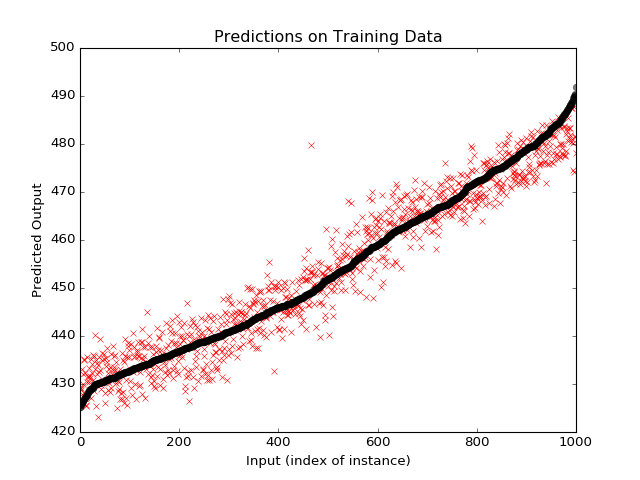

In [9]:
# Plot predictions on Training data 
plt.figure(1)
#first index for plot
init_idx = 0
#last index for plot
end_idx = Ntr

#the following is just for nice plotting, not required
sorting_permutation = sorted(range(len(Ytr[init_idx:end_idx])), key=lambda k: Ytr[init_idx:end_idx][k])
plt.plot(Yhat_tr_np[sorting_permutation], 'rx')
plt.plot(Ytr[sorting_permutation], 'ko', alpha=0.5)

plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Training Data')
plt.show()

### (2) output predictions on validation  data

<IPython.core.display.Javascript object>


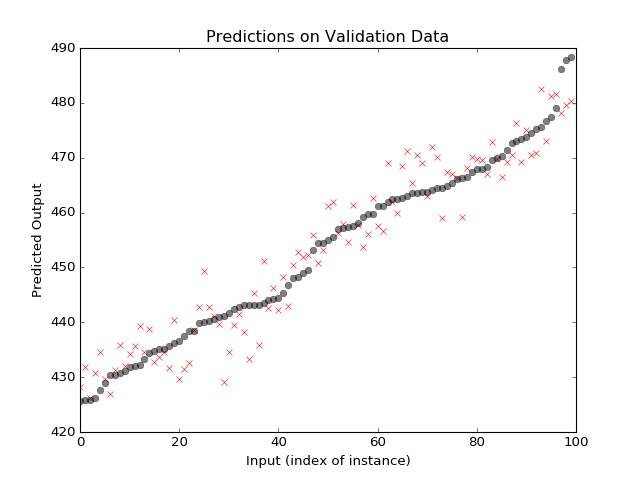

In [10]:
plt.figure(2)
init_idx = 0
end_idx = 100

#the following is just for nice plotting, not required
sorting_permutation = sorted(range(len(Yva[init_idx:end_idx])), key=lambda k: Yva[init_idx:end_idx][k])
plt.plot(Yhat_va_np[sorting_permutation], 'rx')
plt.plot(Yva[sorting_permutation], 'ko', alpha=0.5)

plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Validation Data')
plt.show()

## Training vs. Validation

## TO DO 3

- Compute training and validation error

In [11]:
# Compute Training and Validation Error

ErrTr =  1/Ntr * RSStr_np1
ErrVa =  1/Nva * np.linalg.norm((Yhat_va_np - Yva))**2

#now print them
print "Training Error:", ErrTr
print "Validation Error:", ErrVa

Training Error: 19.7469980947
Validation Error: 21.1010964221


## Question: which one among the training error and the validation error is higher? Why?
## TO DO 4
As we could have expected, the validation error is higher. Indeed the statistical analysis of a linear regression model of the form Y=X*b+ε gives as best linear unbiased estimator of the parameter b the least-squares estimator, so b_np is actually chosen by minimizing the RSS on the training set and thus the training error wich is proportional to it. Otherwise, the validation set didn't take part in the definition of b_np so the model isn't fitted to minimize the RSS of these particular predictions, we just did our best, given the training set and the form of the model, to minimise the RSS of future predictions in general. A "lucky" data splitting could nonetheless lead to inferior validation error, it may happen that the validation outcomes are closer to the hyperplane than thoose used to build it!


## Hypothesis testing:

Test significance of each LS coefficients: find rejection regions for the null hypothesis

$$
H_0 : \beta_j =0
$$

The rejection region (with type-1 probability of error $\alpha$) has the form

$$
{\cal R_j}:=\left\{|\hat \beta_j|> \Delta\right\} \quad \quad \Delta: = \hat\sigma z_{jj}  t_{1-\frac{\alpha}{2}}(N_t-p-1)
$$
where
$$
\hat\sigma^2 : = \frac{1}{N_t-p-1} RSS(\hat\beta)
$$
is the estimator of the noise variance, $z_{jj}$ is the square root of the $j-th$ diagonal element of $\left(X^\top X\right)^{-1}$ (here $X$ contains only the training data) and $t_{1-\frac{\alpha}{2}}(N_t-p-1)$ is the $1-\frac{\alpha}{2}$-percentile of the $T$ distribution with $N_t-p-1$ degrees of freedom ($p=4$ in our case), i.e. 
$$
Pr[T(N_t-p-1)\leq t_{1-\frac{\alpha}{2}}(N_t-p-1)] = 1-\frac{\alpha}{2}
$$


## TO DO 5

- fill the blanks below (question marks)

In [25]:
# fixing type-1 error probability and compute percentiles

from scipy.stats import t

alpha = 0.05

tperc = t.ppf(1-alpha/2, Ntr-Xtr.shape[1], loc=0, scale=1)  # percentiles of t-distribution
 
# Estimate noise variance

sigma2 = (1/(Ntr-4-1))*RSStr_np1

# Compute Delta (one Delta for each coefficient so that Delta wil be a column vector)

Delta = (sigma2**(1/2))*tperc*np.diagonal(Sigma_inv).copy()
# corretto : Delta = (sigma2**(1/2))*tperc*np.sqrt(np.diagonal(Sigma_inv).copy())

# we call ``acceptance region'' the complement of the rejection region. 

# Each row of the matrix A contains the extrem points of the Acceptance region ${\cal A}_j:={\cal R_j}^c$

A = np.transpose(np.vstack((-Delta,+Delta) ))



In [13]:
print "LS coefficients:",  b_np
print "Acceptance Regions:", A

LS coefficients: [ 454.04549985  -14.17766132   -3.33928409    0.52507852   -2.07084049]
Acceptance Regions: [[-0.00874298  0.00874298]
 [-0.05482041  0.05482041]
 [-0.03405027  0.03405027]
 [-0.01324253  0.01324253]
 [-0.01495139  0.01495139]]


## Inspect Rejection Regions
Now let's have a look at the acceptance regions. The $j-th$ row of the matrix $A$ contains the lower and upper intervals (respectively) of the acceptance region for the test above on the $j-th$ coefficient $\beta_j$. If $\hat\beta_j$ belongs to the acceptance region we can accept the hypothesis that the $j-th$ regressor is not relevant. 

Equivalently, we can translate by a quantity $\hat\beta_j$ the Acceptance region and accept the hypothesis $H_0$ if the translated interval contains the origin 



In [23]:
CI = np.transpose(np.vstack((b_np,b_np))) + A

print "Confidence Intervals:", CI

Confidence Intervals: [[  4.53769037e+02   4.54321963e+02]
 [ -1.48699360e+01  -1.34853866e+01]
 [ -3.88487556e+00  -2.79369262e+00]
 [  1.84832746e-01   8.65324303e-01]
 [ -2.43237358e+00  -1.70930740e+00]]


Note that the intervals whose extremes are in $CI$ are nothing but the confidence intervals for $\beta$!

## Now plot confidence intervals (= translated acceptance regions!!!)

<IPython.core.display.Javascript object>


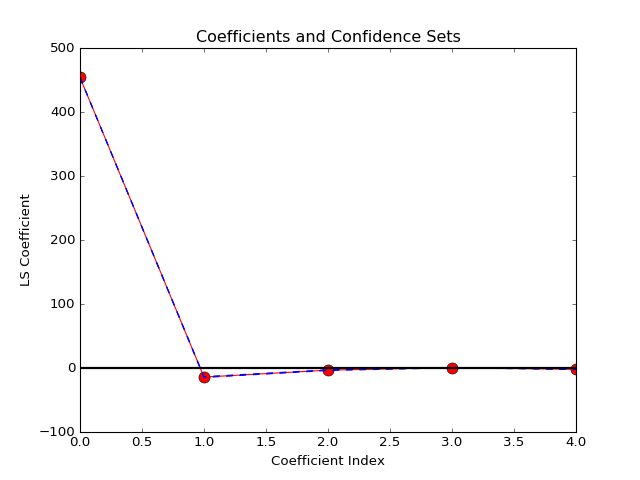

In [24]:
# Plot confidence intervals for the coeffients

plt.figure(3)
plt.plot(b_np, 'r', marker='o', ms=10.0)
plt.plot(CI[:,0], 'b--')
plt.plot(CI[:,1], 'b--')
plt.plot(np.zeros(b_np.shape[0],), 'k', linewidth=2.0)
plt.xlabel('Coefficient Index')
plt.ylabel('LS Coefficient')
plt.title('Coefficients and Confidence Sets')
plt.show()

### Remove useless regressors

## TO DO 6

- Perform same as above removing not useful regressors (based on hypothesis testing/confidence intervals)


In [16]:
# reduced design matrix


Reg_sel = np.array([0,1,2])  #decide which regressors to keep


Xtr_red = Xtr[:,Reg_sel]

Xva_red = Xva[:,Reg_sel]

### NOW FIT AGAIN LINEAR MODEL 

b_np_red, RSStr_np_red, rank_Xtr_red, sv_Xtr_red = np.linalg.lstsq(Xtr_red,Ytr,-1)

## coefficients will be b_np_red

print "LS coefficients:", b_np_red

# Compute predictions
Yhat_tr_np_red = np.dot(Xtr_red, b_np_red)
Yhat_va_np_red = np.dot(Xva_red, b_np_red)

# Compute Training and Validation Error
ErrTr_red = RSStr_np_red/Ntr
ErrVa_red = 1/Nva * np.linalg.norm((Yhat_va_np_red - Yva))**2

print "Training Error (reduced regressors):", ErrTr_red
print "Validation Error:", ErrVa_red


LS coefficients: [ 454.03936496  -12.37914809   -4.43088379]
Training Error (reduced regressors): [ 23.02797492]
Validation Error: 24.6390408716


## TO DO 7
With type-1 probability of error α =0.5 no confidence interval contains the origin, so every regressor is considered useful and shouldn't be removed. In order to finish the homework without repetitions I've removed the last two features anyway : we can see above that this lead to a rise ( around 3.5% points) of both Training Error an Validation Error.

## Plot prediction on validation data reduced regression

<IPython.core.display.Javascript object>


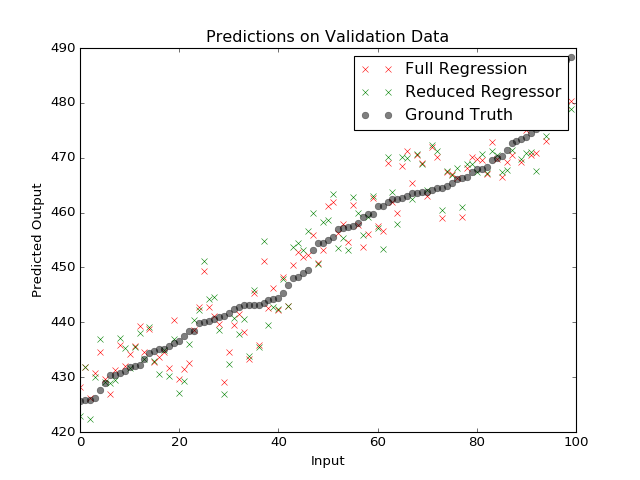

In [17]:
plt.figure(4)
init_idx = 0
end_idx = 100

#the following is just for nice plotting, not required
sorting_permutation = sorted(range(len(Yva[init_idx:end_idx])), key=lambda k: Yva[init_idx:end_idx][k])
plt.plot(Yhat_va_np[sorting_permutation], 'rx')
plt.plot(Yhat_va_np_red[sorting_permutation], 'gx')
plt.plot(Yva[sorting_permutation], 'ko', alpha=0.5)

plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.title('Predictions on Validation Data')
plt.legend(['Full Regression','Reduced Regressor','Ground Truth'])
plt.show()

## TO DO 8
- Explain results in figure above (max 5 lines)

## Now show 3D plot with fitted hyperplane (only w.r.t. selected regressors) for training set


<IPython.core.display.Javascript object>


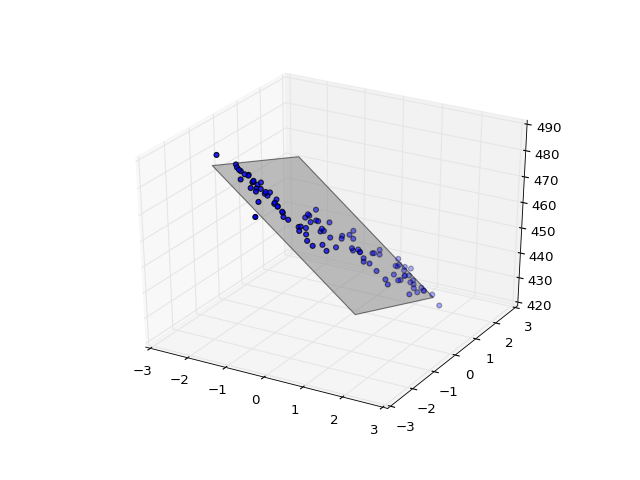

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
#plot only m=100 points
m = 100
x1 = Xtr_red[0:m-1,1]
x2 = Xtr_red[0:m-1,2]
ax.scatter(x1,x2,Yhat_tr_np_red[0:m-1])

#generate a meshgrid to be used to plot surface

#n = number of points to be used in the grid
n=10

x1_surf = np.arange(0.9*min(x1), 1.1*max(x1), (1.1*max(x1)-0.9*min(x1))/n)
x2_surf = np.arange(0.9*min(x2), 1.1*max(x2), (1.1*max(x2)-0.9*min(x2))/n)                

# generate a mesh
x1_surf, x2_surf = np.meshgrid(x1_surf, x2_surf)

#get corresponding input and then the predicted output from linear regression model
x_surf = np.hstack((np.ones((n*n,1)),zip( x1_surf.ravel(),x2_surf.ravel()  )))
y_surf = np.dot(x_surf,b_np_red)

ax.plot_surface(x1_surf,x2_surf,y_surf.reshape(n,n), alpha=0.5, color=[1,1,1])

plt.show()

## Confidence intervals for output predictions

Having estimated the coefficints $\hat \beta$, and given a new location $x_0$, the output prediction  has the form
$$
\hat y_0 : = x_0 ^\top \hat \beta
$$
and postulating that 
$$
y_0 = x_0^\top \beta + \epsilon_0 \quad \epsilon_0 \sim {\cal N}(0,\sigma^2)
$$

a confidence set for $y_0$ can be found, as usual, from the fact that 
$$
y_0 - \hat y_0 \sim {\cal N}(0, x_0^\top {Var}(\hat\beta) x_0 + \sigma^2)
$$
and therefore, a confidence interval for $y_0$ of level $1-\alpha$ has the form 
$$
[ \hat y_0 - \Delta_0, \hat y_0 + \Delta_0] \quad \quad \Delta_0 : = \hat\sigma \, t_{1-\frac{\alpha}{2}}(N_{t}-p-1) \sqrt{x_0^\top (X^\top X)^{-1}x_0 + 1} 
$$

## TO DO 9

- fill the blanks below: need to compute a few quantities. 


<IPython.core.display.Javascript object>


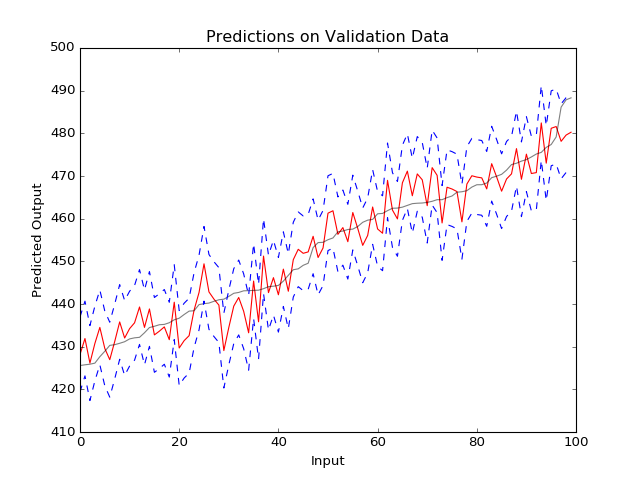

(4569L,)


In [19]:
# Plot predictions and prediction intervals on Validation Data
plt.figure()
init_idx = 0
end_idx = 100
#the following is just for nice plotting, not required
sorting_permutation = sorted(range(len(Yva[init_idx:end_idx])), key=lambda k: Yva[init_idx:end_idx][k])

plt.plot(Yhat_va_np[sorting_permutation], 'r')
plt.plot(Yva[sorting_permutation], 'k', alpha=0.5)

Yhat_va_std = np.sqrt(sigma2* (np.diag((np.dot(np.dot(Xva,(Sigma_inv)),Xva.T)).copy() + 1))) #  compute here standard deviation of output preduction (excluding percentile tperc, see equation below)
print Yhat_va_std.shape

plt.plot(Yhat_va_np[sorting_permutation] - tperc*Yhat_va_std[sorting_permutation], 'b--')
plt.plot(Yhat_va_np[sorting_permutation] + tperc*Yhat_va_std[sorting_permutation], 'b--')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.title('Predictions on Validation Data')
plt.show()

## Ordinary Least-Squares using scikit-learn

For comparison, we provide here a fast way to compute the LS estimate is through sklearn.linear_model

In [20]:
# Remove the ``ones'' column in the features matrix (since sklearn inserts it automatically)
Xtr = Xtr[:,1:]
Xva = Xva[:,1:]

In [21]:
from sklearn import linear_model
reg = linear_model.LinearRegression()  # build the object LinearRegression
reg.fit(Xtr, Ytr)  # estimate the LS coefficients
print "Intercept:", reg.intercept_
print "Least-Squares Coefficients:", reg.coef_
Yhat_tr_np = reg.predict(Xtr)  # predict output values on training set
Yhat_va_np = reg.predict(Xva)  # predict output values on validation set
sigma2 = reg.residues_/(Ntr-Xtr.shape[1]-1)
# reg.residues_ contains the sum of squared residuals
print "Training Error:", 1-reg.score(Xtr, Ytr)
print "Validation Error:", 1-reg.score(Xva, Yva)


Intercept: 454.045499852
Least-Squares Coefficients: [-14.17766132  -3.33928409   0.52507852  -2.07084049]
Training Error: 0.0669347870234
Validation Error: 0.0724385684591


C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)
